In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [17]:
#ilk veri setimizi yükleyelim.
df = pd.read_csv("winequalitywhite.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
#eksik veri olmadığını görüyoruz.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
#veriyi tanıyoruz
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [20]:
#toplam 937 adet yinelenmiş veri var.
df.duplicated().sum()

937

In [21]:
#Hangi kalitede şaraptan kaç tane olduğunu bulduk.
df.value_counts("quality")

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [22]:
#Burada veriyi analiz etmeye başlıyoruz.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


### Özet istatistiklerde görüldüğü gibi medyan ve ortalama yakın olduğu için birçok değişken simetrik dağılıma sahiptir.

<Axes: xlabel='pH', ylabel='Density'>

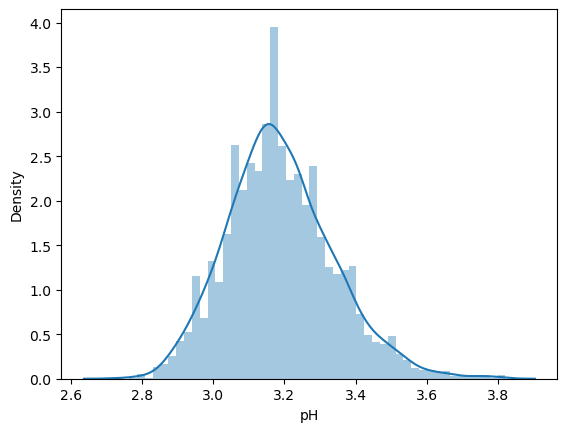

In [23]:
sns.distplot(df["pH"])

# Açıklayıcı değişkenlerin yanıt değişkenine olan etkisini gözlemleyelim.

### "Sitrik asit ve serbest kükürt dioksit değişkenlerinin yanıt değişkenine doğrudan anlamlı bir katkı sağlamadığını tespit ettik. Ancak bu değişkenlerin diğer değişkenlerle olan etkileşimlerini ve modele olan toplam katkılarını daha ayrıntılı analizlerle değerlendirmek gerekebilir. İlk incelemelerimize dayanarak, modelin performansını olumsuz etkilemediği takdirde bu değişkenleri göz ardı edebiliriz."

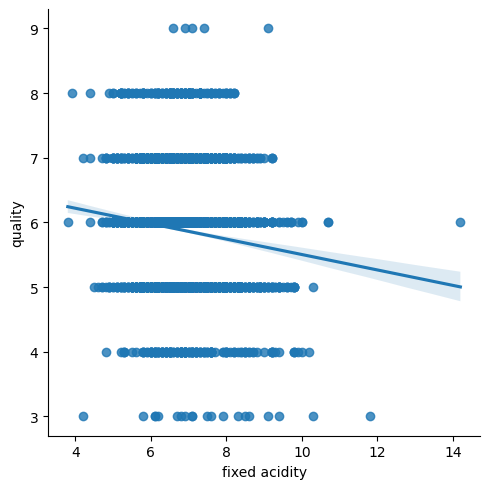

In [24]:
sns.lmplot(x = "fixed acidity", y = "quality", data = df);

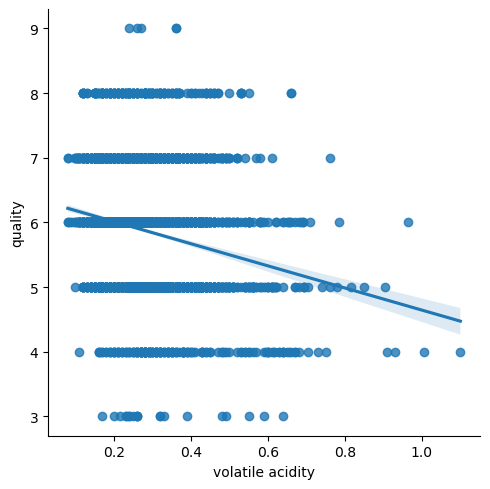

In [25]:
sns.lmplot(x = "volatile acidity", y = "quality", data = df);

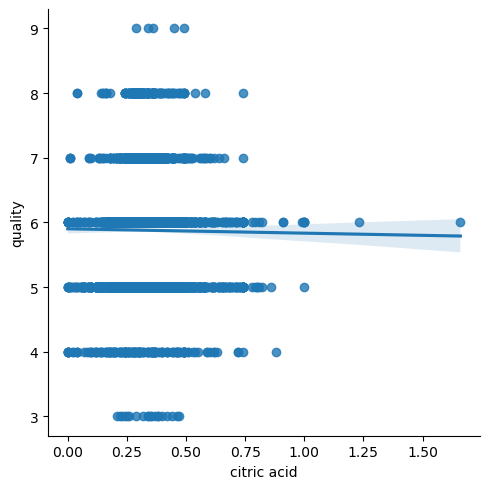

In [26]:
sns.lmplot(x = "citric acid", y = "quality", data = df);

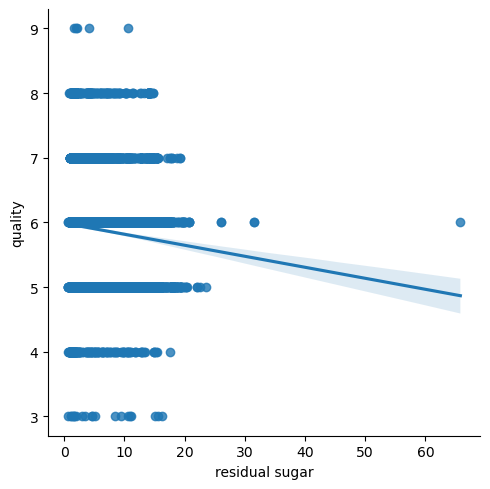

In [27]:
sns.lmplot(x = "residual sugar", y = "quality", data = df);

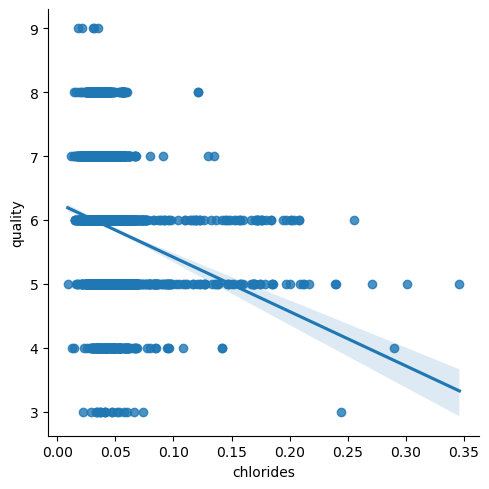

In [28]:
sns.lmplot(x = "chlorides", y = "quality", data = df);

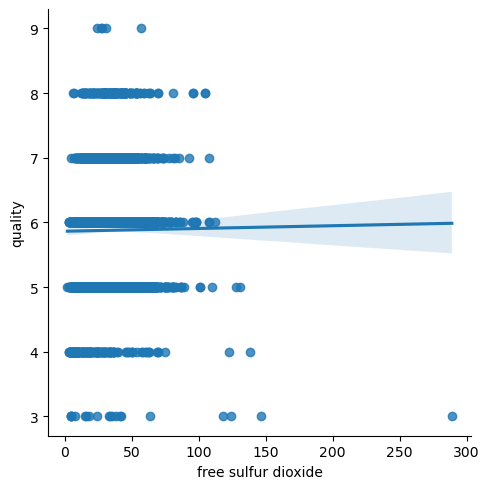

In [29]:
sns.lmplot(x = "free sulfur dioxide", y = "quality", data = df);

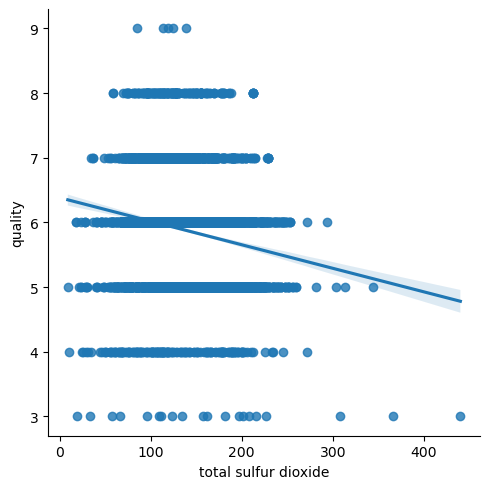

In [30]:
sns.lmplot(x = "total sulfur dioxide", y = "quality", data = df);

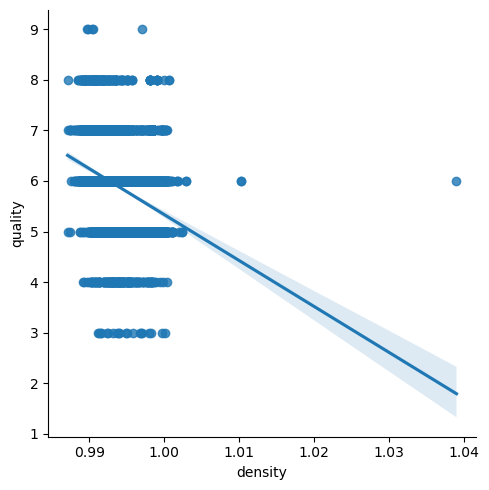

In [31]:
sns.lmplot(x = "density", y = "quality", data = df);

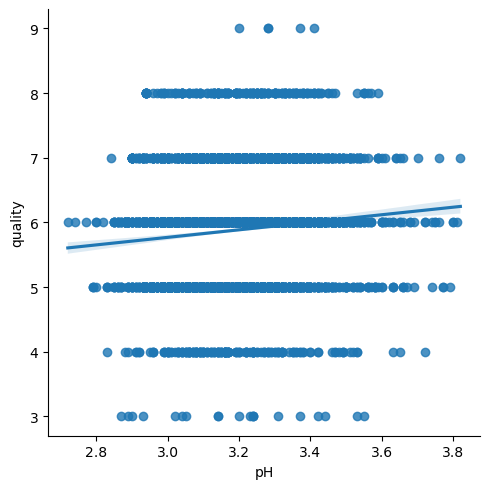

In [32]:
sns.lmplot(x = "pH", y = "quality", data = df);

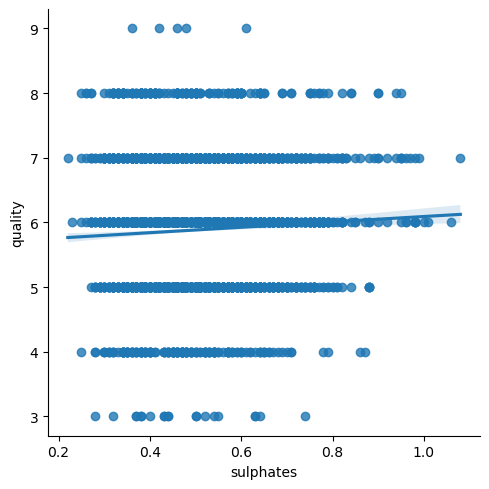

In [33]:
sns.lmplot(x = "sulphates", y = "quality", data = df);

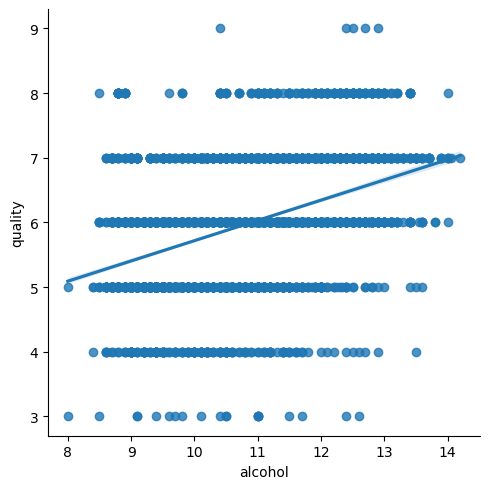

In [34]:
sns.lmplot(x = "alcohol", y = "quality", data = df);

### Isı haritası ile korelasyon analizi yapalım.

<Axes: >

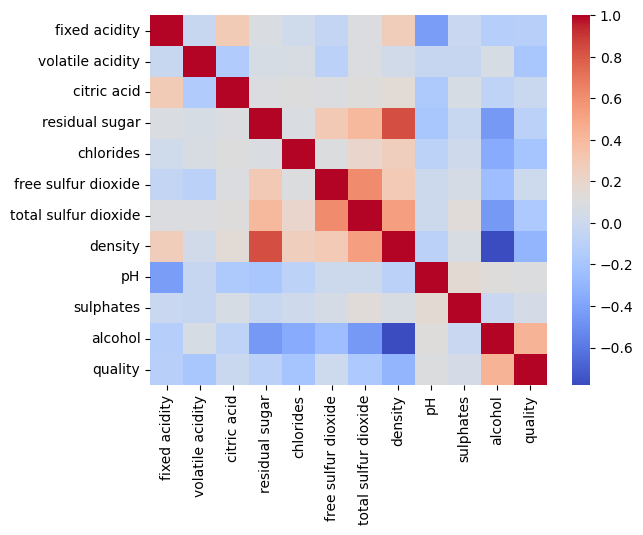

In [35]:
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm')

In [36]:
#Model yapmadan önce aykırı değerleri gözlemleyim.

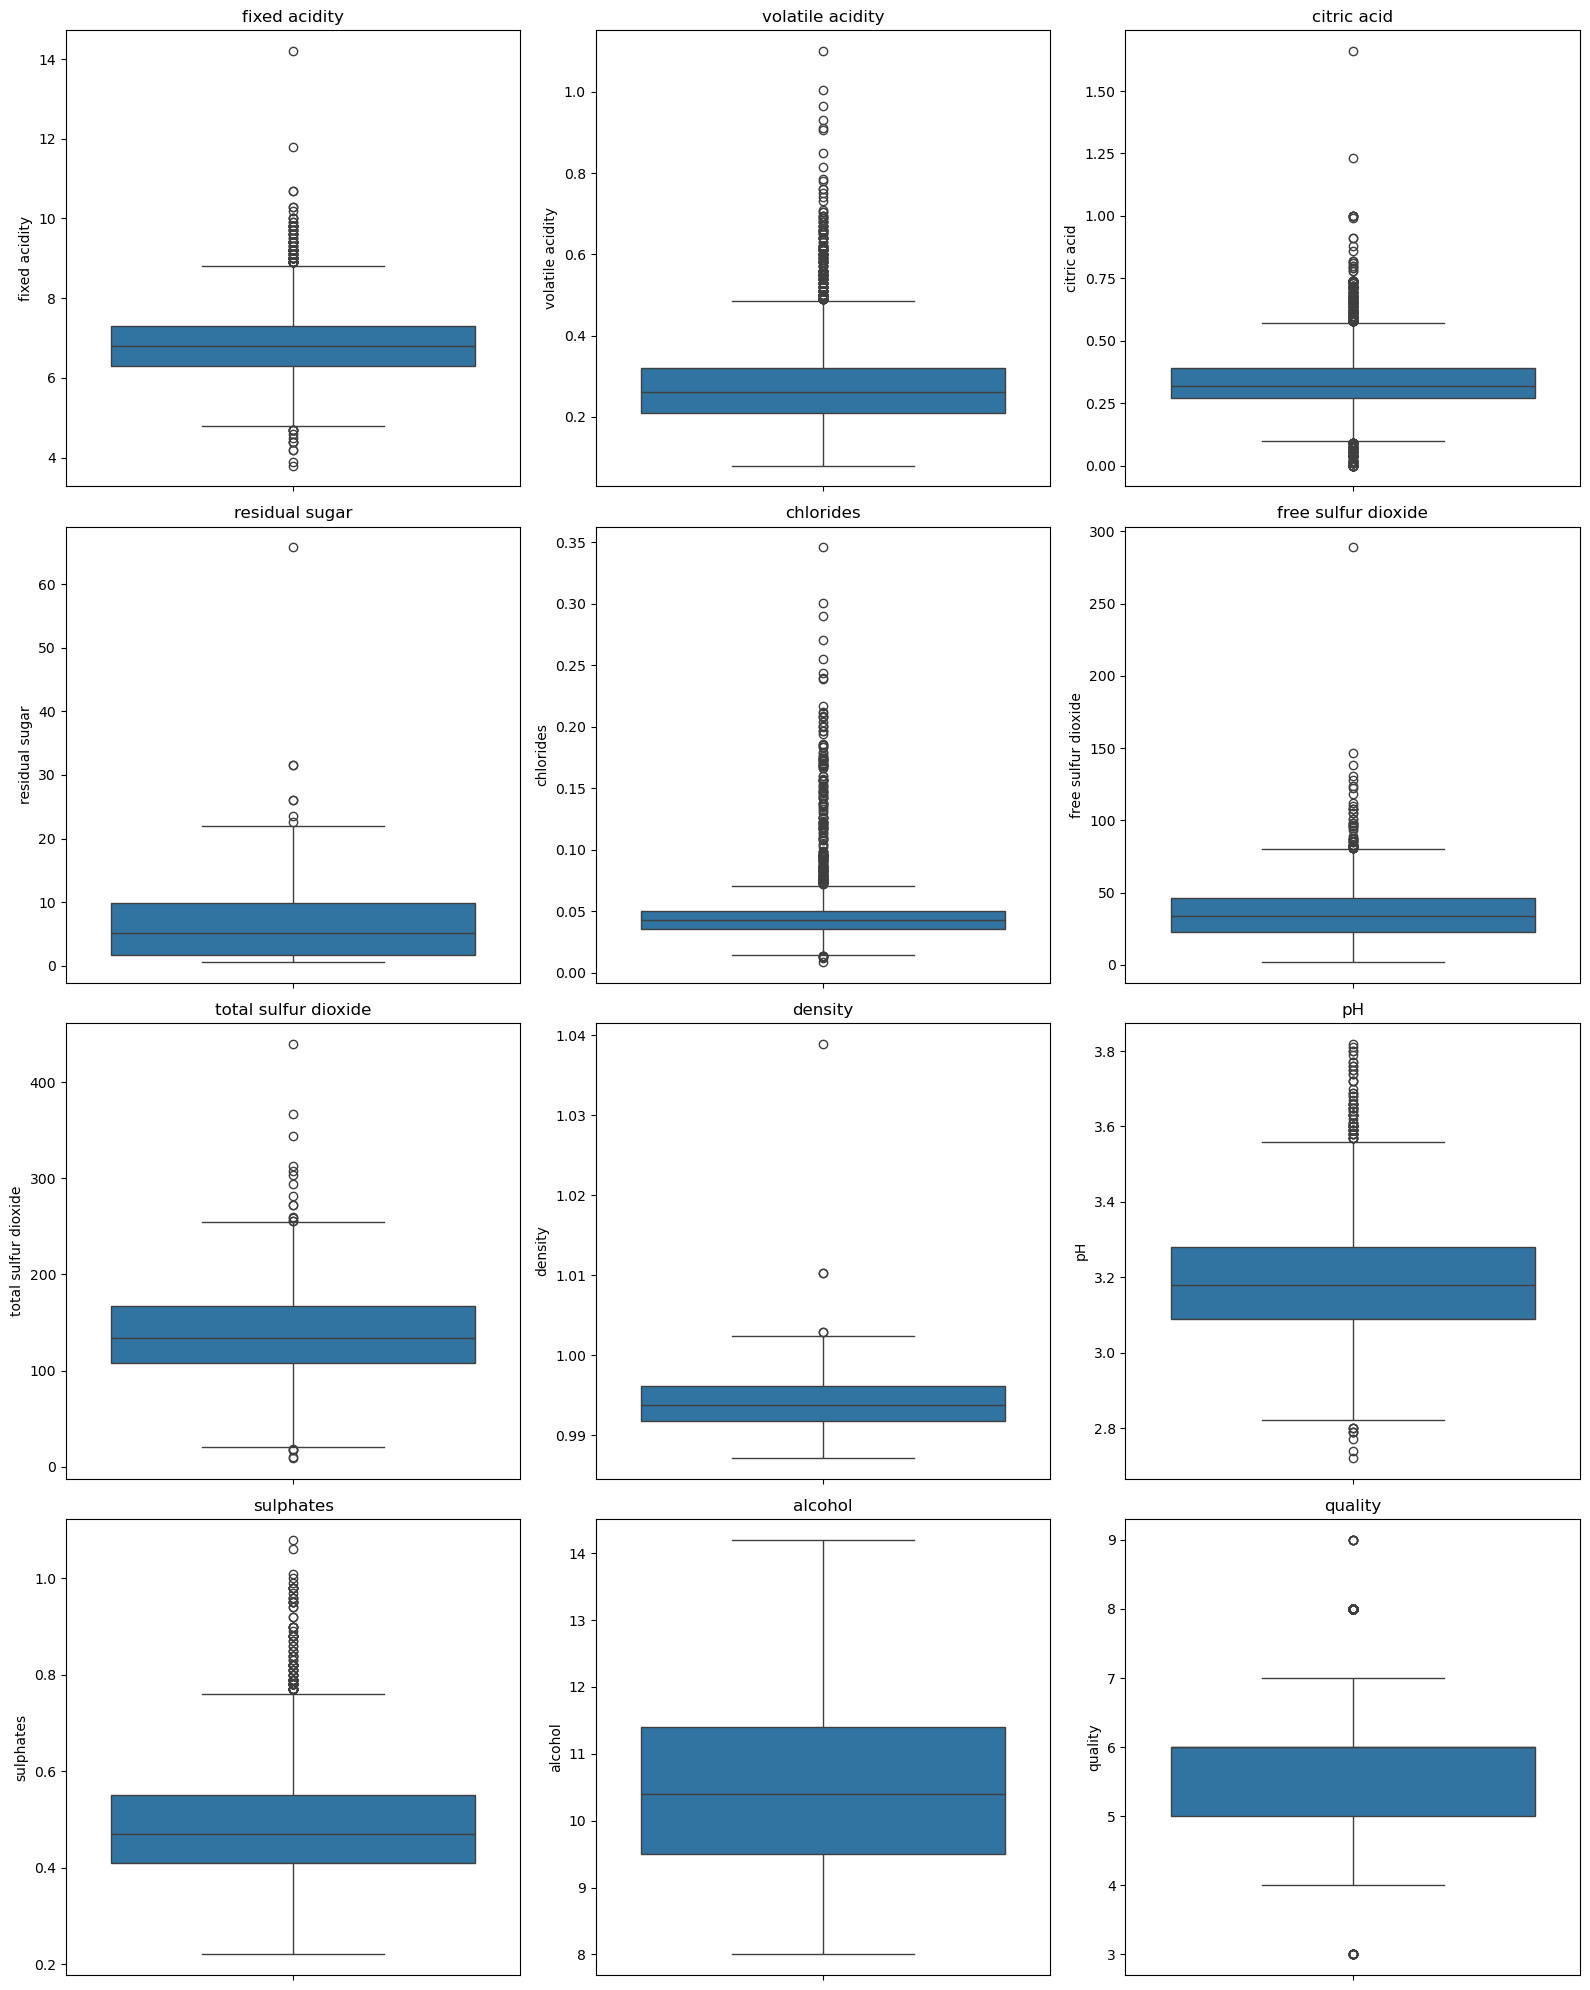

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 20))


for i, column in enumerate(df.columns, 1):  
    plt.subplot(4, 3, i)  
    sns.boxplot(y=df[column])
    plt.title(column)  
    plt.tight_layout()  

plt.show()


### "Aykırı değerleri tespit ettik. İlk modelimizi bu değerlerle birlikte kuracağız. Eğer modelin doğruluk (accuracy) skoru düşük çıkarsa, aykırı değerlerin model üzerindeki etkilerini analiz edeceğiz. Bu analiz sonucunda, gerekirse aykırı değerleri çıkarmayı veya dönüştürmeyi düşünebiliriz.'

# Veri Ön İşleme

In [38]:
#quality yanıt değişkenini kategorik veriye dönüştürelim.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [39]:
from sklearn.preprocessing import OrdinalEncoder

df['quality_category'] = pd.cut(df['quality'], bins=[0, 5, 10], labels=["kötü", "iyi"], include_lowest=True)
ordinal_encoder = OrdinalEncoder(categories=[["kötü","iyi"]])
df['quality'] = ordinal_encoder.fit_transform(df[['quality_category']])

print(df[['quality', 'quality_category']].head())


   quality quality_category
0      1.0              iyi
1      1.0              iyi
2      1.0              iyi
3      1.0              iyi
4      1.0              iyi


In [40]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1.0,iyi
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1.0,iyi
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1.0,iyi
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1.0,iyi
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1.0,iyi


# Model Oluşturma

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Veri bölme
X = df.drop(['quality',"quality_category","citric acid","free sulfur dioxide"], axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model oluşturma ve eğitme
randommodel = RandomForestClassifier(n_estimators=100, random_state=42)
randommodel.fit(X_train, y_train)

# Tahmin ve performans değerlendirme
y_pred = randommodel.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71       397
         1.0       0.85      0.88      0.87       828

    accuracy                           0.82      1225
   macro avg       0.79      0.78      0.79      1225
weighted avg       0.81      0.82      0.82      1225



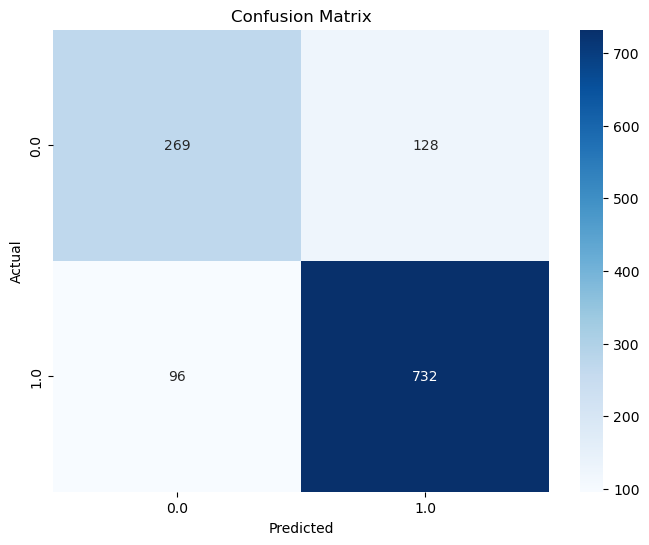

In [42]:

# Confusion Matrix Hesapla
cm = confusion_matrix(y_test, y_pred)

# Heatmap ile Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=randommodel.classes_, yticklabels=randommodel.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [43]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [44]:
from xgboost import XGBClassifier

# Model oluşturma ve eğitme
xgbmodel = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgbmodel.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred = xgbmodel.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.73      0.66      0.70       397
         1.0       0.85      0.88      0.86       828

    accuracy                           0.81      1225
   macro avg       0.79      0.77      0.78      1225
weighted avg       0.81      0.81      0.81      1225



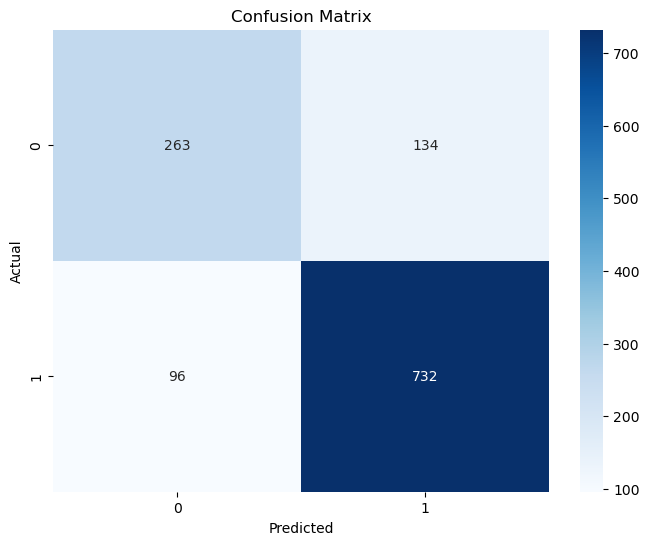

In [45]:
# Confusion Matrix Hesapla
cm = confusion_matrix(y_test, y_pred)

# Heatmap ile Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=xgbmodel.classes_, yticklabels=xgbmodel.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [46]:
from sklearn.svm import SVC
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [47]:
y_pred = svm_model.predict(X_test)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.48      0.55       397
         1.0       0.78      0.88      0.83       828

    accuracy                           0.75      1225
   macro avg       0.72      0.68      0.69      1225
weighted avg       0.74      0.75      0.74      1225



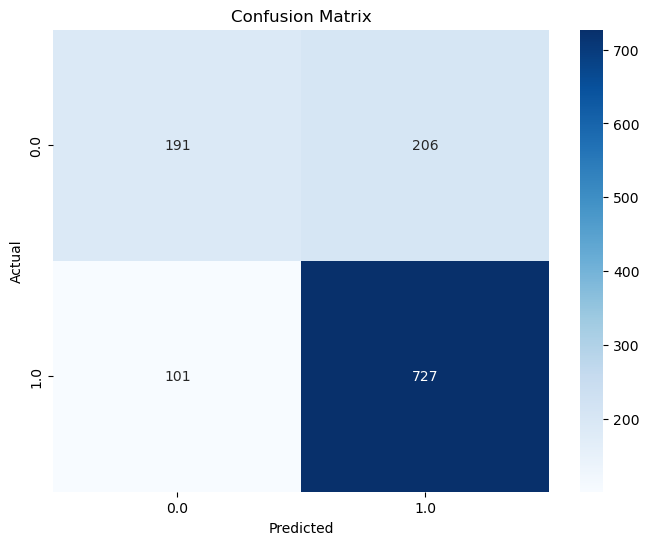

In [49]:
# Confusion Matrix Hesapla
cm = confusion_matrix(y_test, y_pred)

# Heatmap ile Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
knnmodel.fit(X_train, y_train)


KNeighborsClassifier()

In [51]:
y_pred = knnmodel.predict(X_test)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.49      0.54       397
         1.0       0.78      0.84      0.81       828

    accuracy                           0.73      1225
   macro avg       0.68      0.67      0.67      1225
weighted avg       0.72      0.73      0.72      1225



In [53]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(random_state=42)
LRmodel.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [54]:
y_pred = LRmodel.predict(X_test)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.46      0.53       397
         1.0       0.77      0.87      0.82       828

    accuracy                           0.74      1225
   macro avg       0.70      0.67      0.67      1225
weighted avg       0.72      0.74      0.72      1225



In [56]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.65      0.68      0.67       397
         1.0       0.84      0.83      0.84       828

    accuracy                           0.78      1225
   macro avg       0.75      0.75      0.75      1225
weighted avg       0.78      0.78      0.78      1225



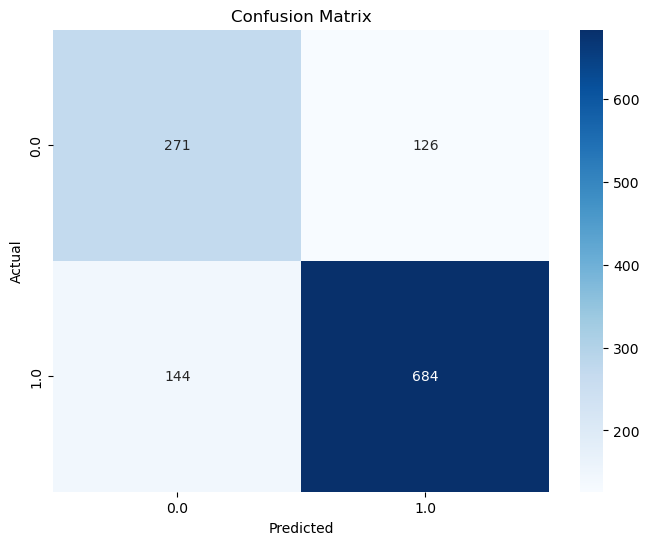

In [57]:
# Confusion Matrix Hesapla
cm = confusion_matrix(y_test, y_pred)

# Heatmap ile Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cart_model.classes_, yticklabels=cart_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.58      0.61       397
         1.0       0.81      0.85      0.83       828

    accuracy                           0.76      1225
   macro avg       0.73      0.71      0.72      1225
weighted avg       0.76      0.76      0.76      1225



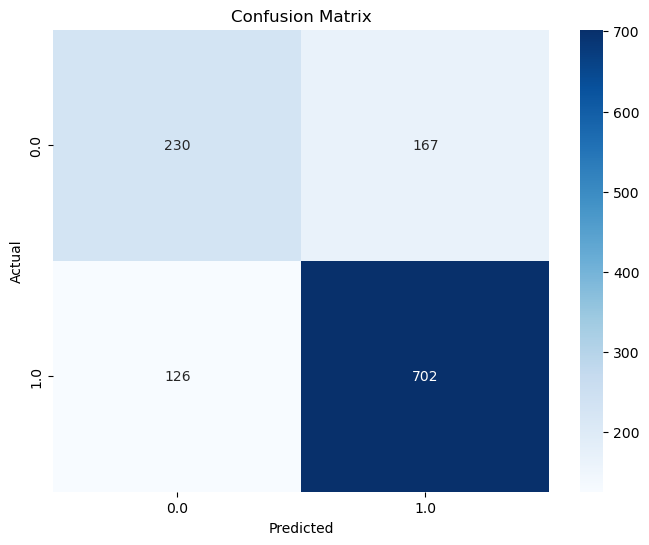

In [59]:
# Confusion Matrix Hesapla
cm = confusion_matrix(y_test, y_pred)

# Heatmap ile Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gbm_model.classes_, yticklabels=gbm_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report


# Kullanılacak modeller
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Classifier (SVC)": SVC(probability=True, random_state=42),
    "GBM": GradientBoostingClassifier(random_state=42)
}

# Başarı metriklerini saklamak için bir DataFrame
results = []

# Modelleri eğitme ve değerlendirme
for name, model in models.items():
    # Model eğitimi
    model.fit(X_train, y_train)
    
    # Tahminler
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrikler
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    
    # Sonuçları saklama
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

# Sonuçları bir DataFrame'e çevirip sıralama
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print(results_df)

# En iyi modelin raporunu görüntüleme
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)
print(f"\n{best_model_name} için Classification Report:\n")
print(classification_report(y_test, y_pred))


                             Model  Accuracy  F1 Score   ROC AUC
0                    Random Forest  0.817143  0.867299  0.880179
1                          XGBoost  0.812245  0.864227  0.862894
3                    Decision Tree  0.766531  0.827086  0.734202
6                              GBM  0.760816  0.827342  0.817955
4              Logistic Regression  0.738776  0.816092  0.786919
2              K-Nearest Neighbors  0.726531  0.805572  0.732976
5  Support Vector Classifier (SVC)  0.681633  0.809011  0.727330

Random Forest için Classification Report:

              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71       397
         1.0       0.85      0.88      0.87       828

    accuracy                           0.82      1225
   macro avg       0.79      0.78      0.79      1225
weighted avg       0.81      0.82      0.82      1225



## Random forest, XGBoost, Decision Tree, KNN, Lojistik Regresyon, GBM, SVC modelleri oluşturduk ve karşılaştırdık.Accuracy,f1,precision ve recall değerlerinin en tutarlı olduğu model random forest olduğu gözlemleniyor.Tahmin yaparken random forest modeli kullanacağız.


### Burada modeli gerçek verilerle denedik %80 doğru sonuç veriyor.

In [61]:
new_data = pd.DataFrame([{
    "fixed acidity": 6.2,
    "volatile acidity": 0.66,
    "residual sugar": 1.2,
    "chlorides": 0.029,
    "total sulfur dioxide": 75.0,
    "density": 0.9892,
    "pH": 3.33,
    "sulphates": 0.39,
    "alcohol": 12.8,
    
}])


tahmin = randommodel.predict(new_data)


if tahmin == 0:
  print("Tahmin Edilen Kalite: Kötü")
else:
  print("Tahmin Edilen Kalite: İyi")


Tahmin Edilen Kalite: İyi


# Angora

In [62]:
new_data = pd.DataFrame([{
    "fixed acidity": 7,
    "volatile acidity": 0.3,
    "residual sugar": 1.4,
    "chlorides": 0.029,
    "total sulfur dioxide": 125.0,
    "density": 0.9892,
    "pH": 3.2,
    "sulphates": 0.39,
    "alcohol": 12.0,
    
}])


tahmin = randommodel.predict(new_data)


if tahmin == 0:
  print("Tahmin Edilen Kalite: Kötü")
else:
  print("Tahmin Edilen Kalite: İyi")

Tahmin Edilen Kalite: İyi


# Chardonnay

In [63]:
new_data = pd.DataFrame([{
    "fixed acidity": 6.5,
    "volatile acidity": 0.28,
    "residual sugar": 2.5,
    "chlorides": 0.045,
    "total sulfur dioxide": 120.0,
    "density": 0.9920,
    "pH": 3.3,
    "sulphates": 0.5,
    "alcohol": 13.0,
    
}])


tahmin = randommodel.predict(new_data)


if tahmin == 0:
  print("Tahmin Edilen Kalite: Kötü")
else:
  print("Tahmin Edilen Kalite: İyi")

Tahmin Edilen Kalite: İyi


# Biricik 

In [64]:
new_data = pd.DataFrame([{
    "fixed acidity": 5.5,
    "volatile acidity": 0.65,
    "residual sugar": 1.5,
    "chlorides": 0.080,
    "total sulfur dioxide": 65.0,
    "density": 0.9978,
    "pH": 3.5,
    "sulphates": 0.3,
    "alcohol": 9.0,
    
}])


tahmin = randommodel.predict(new_data)


if tahmin == 0:
  print("Tahmin Edilen Kalite: Kötü")
else:
  print("Tahmin Edilen Kalite: İyi")

Tahmin Edilen Kalite: Kötü
